# Focus on advection


Climate and numerical weather prediction models are constructed using
5 fundamental set of equations

## climate model equation set


- equations of motion 
- equations of state
- thermodynamic equation 
- mass balance equation 
- water balance equation 

The key equations of motion are an expression of Newton's second law $F=ma$, where the acceleration is due to the sum of the following forces:

$\frac{D{\bf u}}{Dt} = \frac{d {\bf u}}{dt} + {\bf u}.\nabla {\bf u} = -\frac{1}{\rho}\Delta p - f{\bf k} \times {\bf u}
  - g {\bf k} + F$
  
where ${\bf u}$ is the motion vector, $\rho$ density, $p$ pressure, $f$
Coriolis force due to the Earth's rotation, $g$
gravity and $F$ frictional forces. Here the terms on the RHS represent, respectively, the force due to pressure gradients, the Coriolis force resulting from the rotation of the planet, the force due to gravity which acts in the vertical, and lastly the frictional forces represented by $F$. 


The term on the left represents the Lagrangian derivative, that is,
the rate of change moving with the flow
($\frac{D}{Dt}=\frac{d}{dt}+{\bf u}.\nabla$), which as we saw in the first term's course, consists of the local Eulurian rate of change summed with the advection term, it is this advection term that we will examine in this lecture.

The other equations of a climate or NWP model are:

Equation of State:
$p=\rho R T$

Thermodynamic equation:
$dQ = c_p dT - v dp$

Mass continuity:

$\frac{D\rho}{Dt}=-\rho \nabla.{\bf u}$



$\frac{Dq}{Dt}= \frac{dq}{dt}+u\frac{dq}{dx}=S=0$

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# parameter
xsize=100. #(m)
dx=1  # (m)

dt=0.05 # timestep (sec)
uvel=1.0  # horizontal velocity (m/s)
time=400. # total time of the simulation

# set up x grid and initial profile of q 
xpt=np.linspace(0,xsize,int(xsize/dx)+1)
qinit=np.sin(2*np.pi*xpt/(xsize+1))

#qinit=(xpt>xsize/2)*2-1
#qinit=(qinit+np.roll(qinit,1)+np.roll(qinit,-1))/3
print(qinit)

[ 0.          0.06216964  0.12409875  0.18554775  0.24627891  0.30605725
  0.36465153  0.42183503  0.47738654  0.53109113  0.58274104  0.63213643
  0.67908621  0.72340873  0.76493253  0.80349695  0.8389528   0.87116291
  0.90000265  0.92536046  0.94713823  0.9652517   0.97963081  0.99021991
  0.99697804  0.99987906  0.99891174  0.99407983  0.98540202  0.97291187
  0.95665772  0.93670244  0.91312325  0.88601136  0.85547166  0.82162231
  0.78459427  0.74453078  0.70158684  0.6559286   0.6077327   0.5571856
  0.50448286  0.44982838  0.39343359  0.33551669  0.27630173  0.21601782
  0.15489818  0.09317927  0.03109986 -0.03109986 -0.09317927 -0.15489818
 -0.21601782 -0.27630173 -0.33551669 -0.39343359 -0.44982838 -0.50448286
 -0.5571856  -0.6077327  -0.6559286  -0.70158684 -0.74453078 -0.78459427
 -0.82162231 -0.85547166 -0.88601136 -0.91312325 -0.93670244 -0.95665772
 -0.97291187 -0.98540202 -0.99407983 -0.99891174 -0.99987906 -0.99697804
 -0.99021991 -0.97963081 -0.9652517  -0.94713823 -0.

Now we want to discretize the equation

Using forward in time for $\frac{dq}{dt}$ and centered in space difference for $\frac{dq}{dx}$

$\frac{q_{t+1,i}-q_{t,i}}{\Delta t} + u \frac{q_{t,i+1}-q_{t,i-1}}{2 \Delta x}=0$

giving us an expression for the future value 

$q_{t+1,i} = q_{t,i} - u\Delta t \frac{q_{t,i+1}-q_{t,i-1}}{2 \Delta x}$



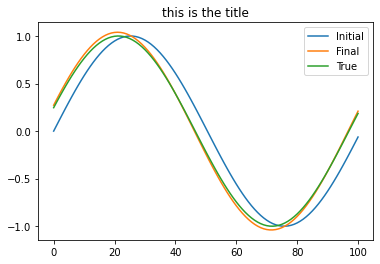

In [3]:
nsteps=int(time/dt)
q0=qinit # current value
K0=uvel*dt/(2*dx)

# integrate equations
for it in range(nsteps):
    q1=q0-K0*(np.roll(q0,-1)-np.roll(q0,1))
    q0=q1
    qtrue=np.roll(qinit,int((it+1)*dt*uvel))

fig, ax = plt.subplots()
ax.set_title("this is the title")
ax.plot(xpt,qinit,label="Initial")       
ax.plot(xpt,q1,label="Final")
ax.plot(xpt,qtrue,label="True")

ax.legend() 
plt.show()

In [4]:
xtest=np.array(range(10))
xtest

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
np.roll(xtest,-1)


array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])